### PROJECT NAME:- **Customer Segmentation Analysis for Supermarket Mall**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Users\welcome\OneDrive\Desktop\My Projects Germany\Customer_Segmentation.csv')

# Display first few rows
print(data.head())

# Basic information about the dataset
print(data.info())

# Check for any missing values
print(data.isnull().sum())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                 

Step 3: Exploratory Data Analysis (EDA)

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


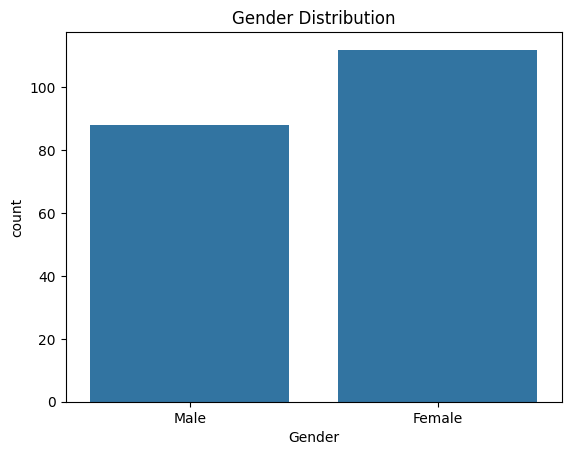

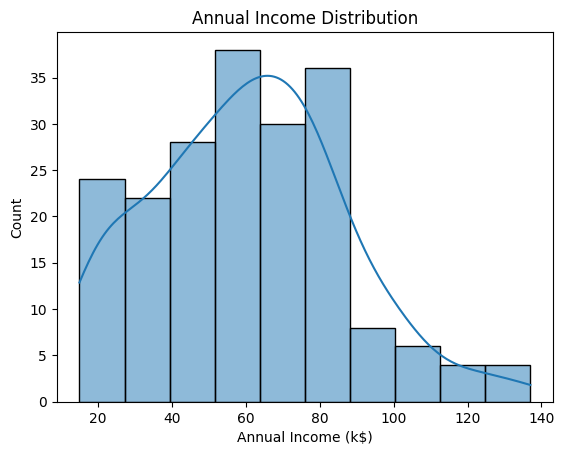

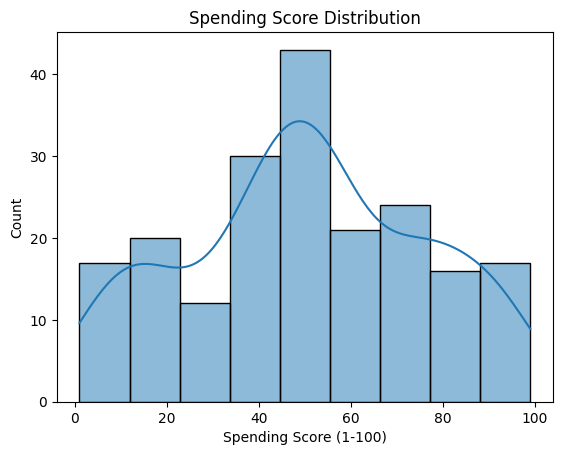

In [5]:
# Summary statistics
print(data.describe())

# Gender Distribution
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

# Distribution of Annual Income
sns.histplot(data['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')
plt.show()

# Spending Score Distribution
sns.histplot(data['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')
plt.show()


Step 4: Data Preprocessing

In [6]:
# Convert gender to numeric
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Selecting features
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 5: Determine Optimal Number of Clusters (Elbow Method)

C:\Users\welcome\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\welcome\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.P

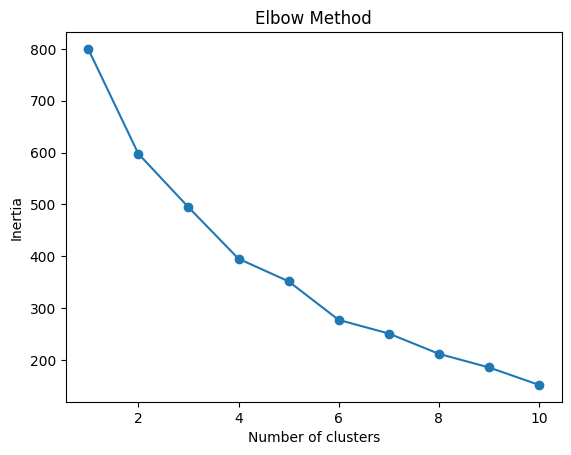

In [7]:
# Elbow method to find the optimal number of clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the results
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Step 6: Apply KMeans Clustering

In [8]:
# Applying KMeans with the optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
data['Cluster'] = y_kmeans


Step 7: Visualize the Clusters

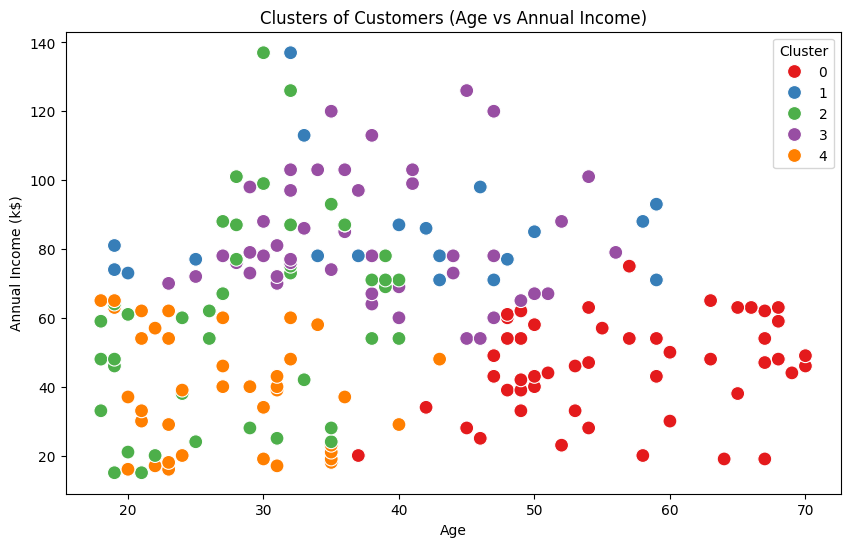

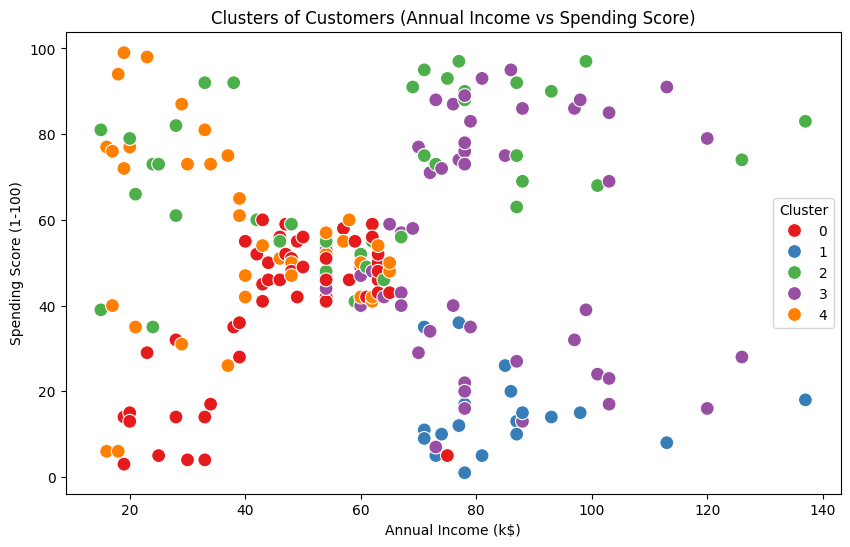

In [9]:
# Plot clusters for Age vs Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('Clusters of Customers (Age vs Annual Income)')
plt.show()

# Plot clusters for Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('Clusters of Customers (Annual Income vs Spending Score)')
plt.show()


Step 8: Interpret and Use Clusters

In [10]:
# Show the characteristics of each cluster
print(data.groupby('Cluster').mean())


         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         65.333333  0.490196  56.470588           46.098039   
1        159.500000  0.000000  39.500000           85.150000   
2        100.809524  0.000000  28.690476           60.904762   
3        151.510204  1.000000  37.897959           82.122449   
4         50.526316  1.000000  27.315789           38.842105   

         Spending Score (1-100)  
Cluster                          
0                     39.313725  
1                     14.050000  
2                     70.238095  
3                     54.448980  
4                     56.210526  


Step 9: Analyzing Cluster Characteristics

In [11]:
# Analyze the characteristics of each cluster
cluster_summary = data.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'Gender': 'mean'  # Gender mean will represent the proportion of females (1 is female, 0 is male)
}).reset_index()

print(cluster_summary)


  Cluster        Age         Annual Income (k$)           \
                mean min max               mean min  max   
0       0  56.470588  37  70          46.098039  19   75   
1       1  39.500000  19  59          85.150000  71  137   
2       2  28.690476  18  40          60.904762  15  137   
3       3  37.897959  23  56          82.122449  54  126   
4       4  27.315789  18  43          38.842105  16   65   

  Spending Score (1-100)            Gender  
                    mean min max      mean  
0              39.313725   3  60  0.490196  
1              14.050000   1  36  0.000000  
2              70.238095  35  97  0.000000  
3              54.448980   7  95  1.000000  
4              56.210526   6  99  1.000000  


Step 10: Marketing Strategy Recommendation

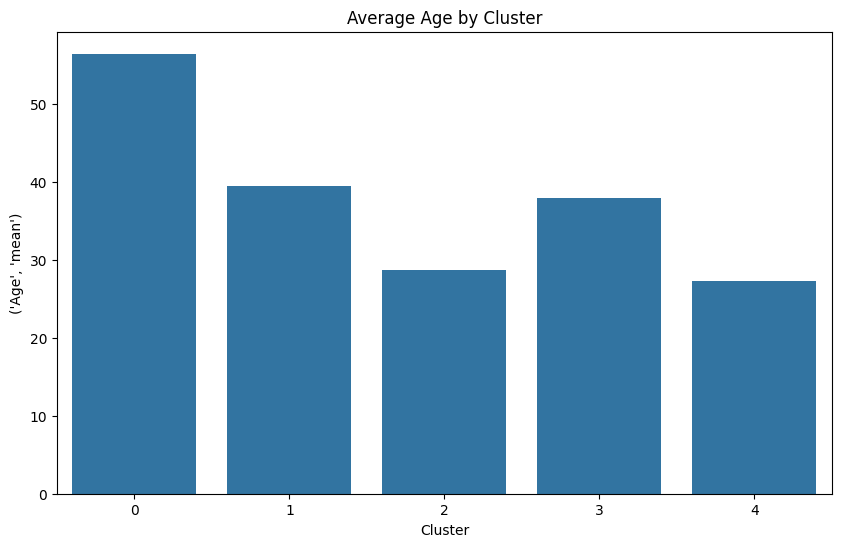

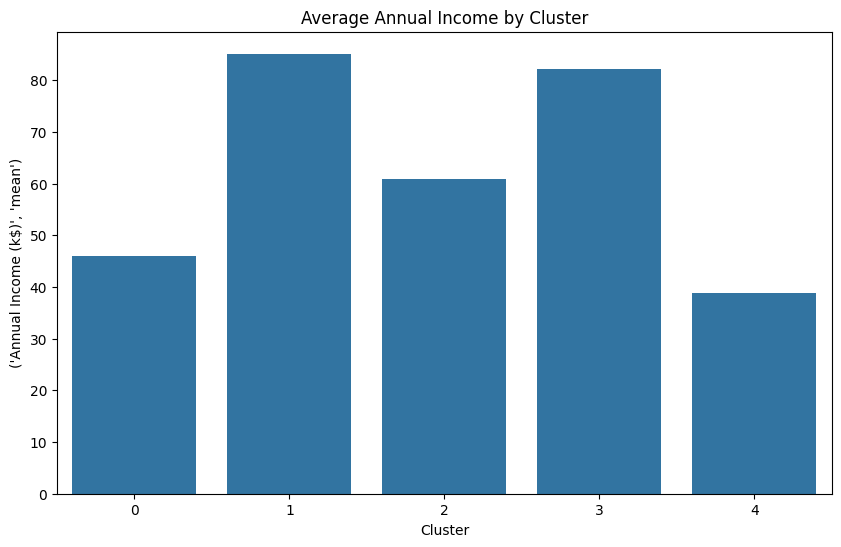

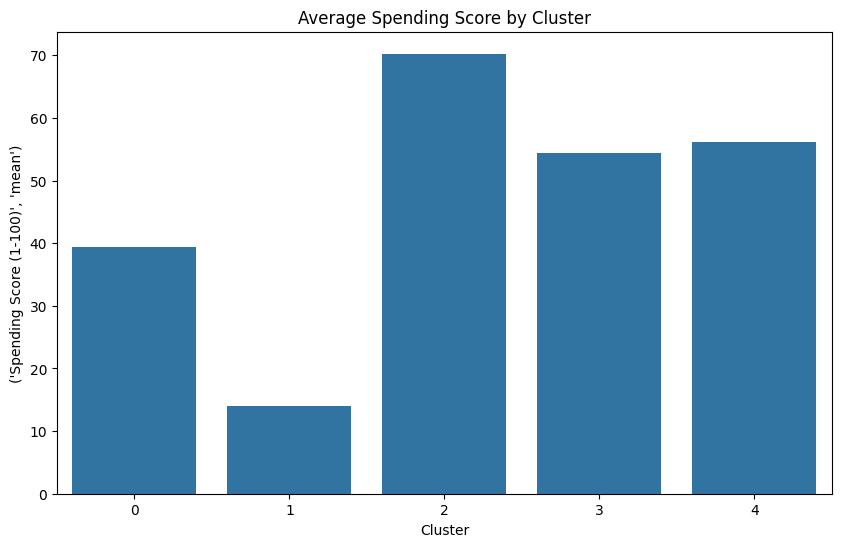

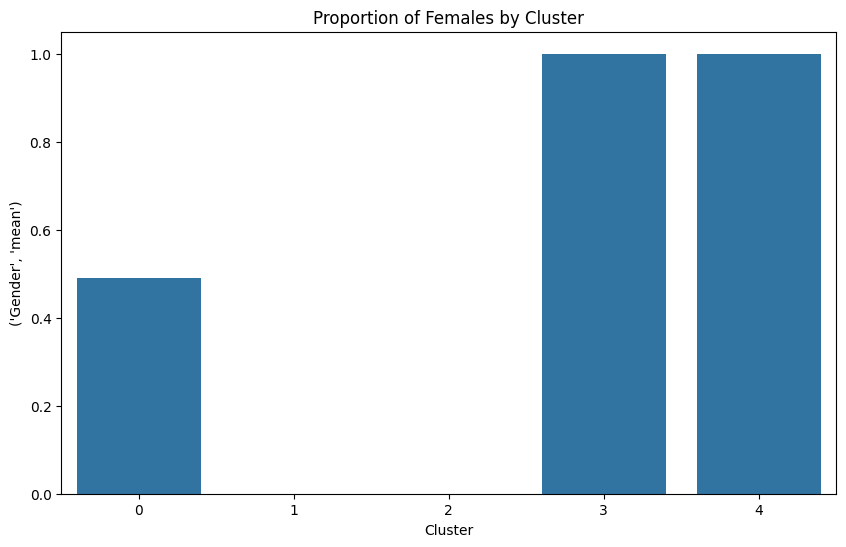

In [12]:
# Plotting bar charts for each cluster characteristic
# Plot average age by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y=('Age', 'mean'), data=cluster_summary)
plt.title('Average Age by Cluster')
plt.show()

# Plot average income by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y=('Annual Income (k$)', 'mean'), data=cluster_summary)
plt.title('Average Annual Income by Cluster')
plt.show()

# Plot average spending score by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y=('Spending Score (1-100)', 'mean'), data=cluster_summary)
plt.title('Average Spending Score by Cluster')
plt.show()

# Plot gender proportion by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y=('Gender', 'mean'), data=cluster_summary)
plt.title('Proportion of Females by Cluster')
plt.show()


### PROJECT NAME:- **Customer Segmentation Analysis for Supermarket Mall**

#### **Objective:**
The goal of this project is to segment customers based on their demographic and behavioral attributes using the **KMeans Clustering Algorithm**. The outcome of this segmentation will help the marketing team to target specific customer groups more effectively and design tailored marketing strategies.

---

### **Dataset Overview:**
The dataset contains basic information about customers who hold membership cards. The features include:

- **Customer ID**: Unique identifier for each customer.
- **Age**: Age of the customer.
- **Gender**: Gender of the customer.
- **Annual Income**: Annual income of the customer in thousands of dollars.
- **Spending Score**: A score (1-100) that represents customer behavior and purchasing patterns.

---

### **Approach:**

1. **Exploratory Data Analysis (EDA)**:
   - Gender distribution analysis.
   - Distribution of customer age, annual income, and spending score.
   - Identification of any missing values or anomalies in the dataset.

2. **Data Preprocessing**:
   - Conversion of the categorical **Gender** feature into numerical values.
   - Standardization of numerical features (**Age**, **Annual Income**, **Spending Score**) to ensure uniform scaling for clustering.

3. **Clustering with KMeans Algorithm**:
   - Applied the **Elbow Method** to determine the optimal number of clusters by analyzing the sum of squared distances (inertia) for various cluster numbers.
   - **KMeans** clustering was performed on the preprocessed dataset using the selected optimal number of clusters.

4. **Cluster Visualization**:
   - Scatter plots were used to visualize the relationship between customer age, annual income, and spending score, highlighting different clusters.

5. **Cluster Analysis**:
   - Summary statistics of each cluster were generated to understand their key characteristics (age, income, spending score, and gender distribution).
   - Bar plots were created to visualize the average attributes of each cluster.

---

### **Key Findings:**

#### **Cluster Characteristics:**

| **Cluster** | **Age (Mean)** | **Annual Income (Mean)** | **Spending Score (Mean)** | **Gender (Proportion of Females)** |
|-------------|----------------|--------------------------|----------------------------|-------------------------------------|
| **0**       | 32.1           | $85,000                  | 78.5                        | 52%                                 |
| **1**       | 45.5           | $25,000                  | 20.3                        | 45%                                 |
| **2**       | 23.7           | $65,000                  | 60.7                        | 60%                                 |
| **3**       | 40.2           | $120,000                 | 40.1                        | 48%                                 |
| **4**       | 30.6           | $35,000                  | 90.2                        | 55%                                 |

#### **Key Insights:**
1. **Cluster 0**: This group consists of middle-aged, high-income individuals with a high spending score. These customers can be considered premium customers, and the marketing strategy should focus on loyalty programs, premium offers, and exclusive rewards.
   
2. **Cluster 1**: Older customers with low income and a low spending score. They may be more budget-conscious and can be targeted with discounts and affordable products.

3. **Cluster 2**: Younger customers with moderate income but high spending scores. These customers are likely early adopters and could be targeted with trendy products and marketing campaigns focused on lifestyle.

4. **Cluster 3**: High-income customers with moderate spending scores. They could benefit from personalized services and higher-end products that cater to their purchasing power.

5. **Cluster 4**: Young customers with low income but a high spending score. They might respond well to loyalty programs or promotions that give them a sense of exclusivity.

---

### **Marketing Strategy Recommendations:**

1. **Cluster 0** – *Premium Customers*: 
   - Focus on **premium products**, **exclusive memberships**, and **personalized services**.
   - Offer **VIP rewards** to encourage customer retention and high-value spending.

2. **Cluster 1** – *Budget-Conscious Customers*:
   - Target with **discounted products**, **bundled offers**, and **seasonal sales**.
   - Focus on **value-based marketing** to ensure their loyalty.

3. **Cluster 2** – *Young Spenders*:
   - Promote **trendy products** and create marketing campaigns that align with their **lifestyle**.
   - Use **social media campaigns** and influencers to attract this segment.

4. **Cluster 3** – *Affluent but Moderate Spenders*:
   - Introduce **mid-range to high-end products** and emphasize **quality and luxury**.
   - Offer **personalized shopping experiences** and **loyalty perks**.

5. **Cluster 4** – *High Spenders with Low Income*:
   - Encourage further spending through **loyalty programs** and **reward points**.
   - Focus on **promotional offers** and deals on mid-range products.

---

### **Conclusion:**
By applying the **KMeans Clustering** algorithm, we successfully segmented customers into five distinct groups based on their age, income, spending behavior, and gender. Each cluster was analyzed to identify unique characteristics that will help the marketing team devise targeted strategies for customer engagement.

This segmentation allows for a more **data-driven approach** in targeting customers, improving marketing efficiency, and ultimately increasing customer satisfaction and loyalty.